# Import Libraires 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Load and explore data

In [20]:


df = pd.read_csv('/kaggle/input/anemia-types-classification/diagnosed_cbc_data_v4.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset shape: (1281, 15)
Columns: ['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT', 'Diagnosis']


In [21]:
# Basic info about target variable
print("\n🎯 Target Variable Distribution:")
target_counts = df['Diagnosis'].value_counts()
print(target_counts)


🎯 Target Variable Distribution:
Diagnosis
Healthy                           336
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Iron deficiency anemia            189
Thrombocytopenia                   73
Other microcytic anemia            59
Leukemia                           47
Macrocytic anemia                  18
Leukemia with thrombocytopenia     11
Name: count, dtype: int64


# Visualization 1: Target Distribution

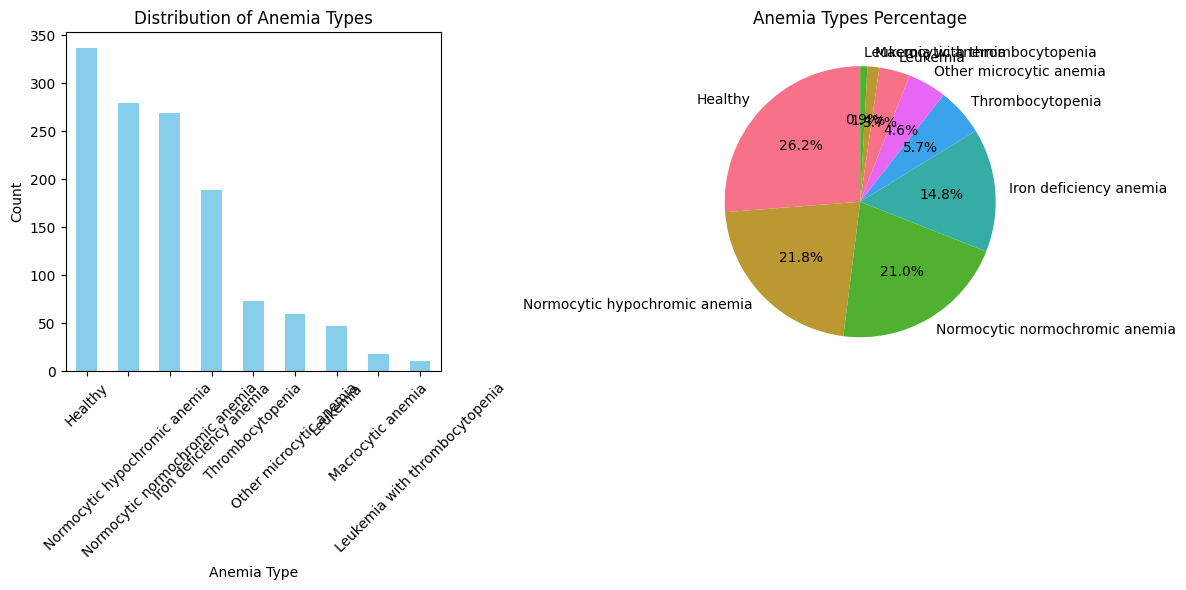

In [22]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
target_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Anemia Types')
plt.xlabel('Anemia Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Anemia Types Percentage')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [23]:

print("\n🔧 Preprocessing Data...")

# Handle missing values by filling with median
df = df.fillna(df.median(numeric_only=True))

# Convert all columns to numeric (except diagnosis)
numeric_cols = df.columns.drop('Diagnosis')
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill any remaining NaN values
df = df.fillna(df.median(numeric_only=True))

# Encode target variable
le = LabelEncoder()
df['Diagnosis_encoded'] = le.fit_transform(df['Diagnosis'])

print(f"Target classes: {list(zip(le.classes_, range(len(le.classes_))))}")


🔧 Preprocessing Data...
Target classes: [('Healthy', 0), ('Iron deficiency anemia', 1), ('Leukemia', 2), ('Leukemia with thrombocytopenia', 3), ('Macrocytic anemia', 4), ('Normocytic hypochromic anemia', 5), ('Normocytic normochromic anemia', 6), ('Other microcytic anemia', 7), ('Thrombocytopenia', 8)]


# Visualization 2: Key Features Distribution


📈 Visualizing Key Features...


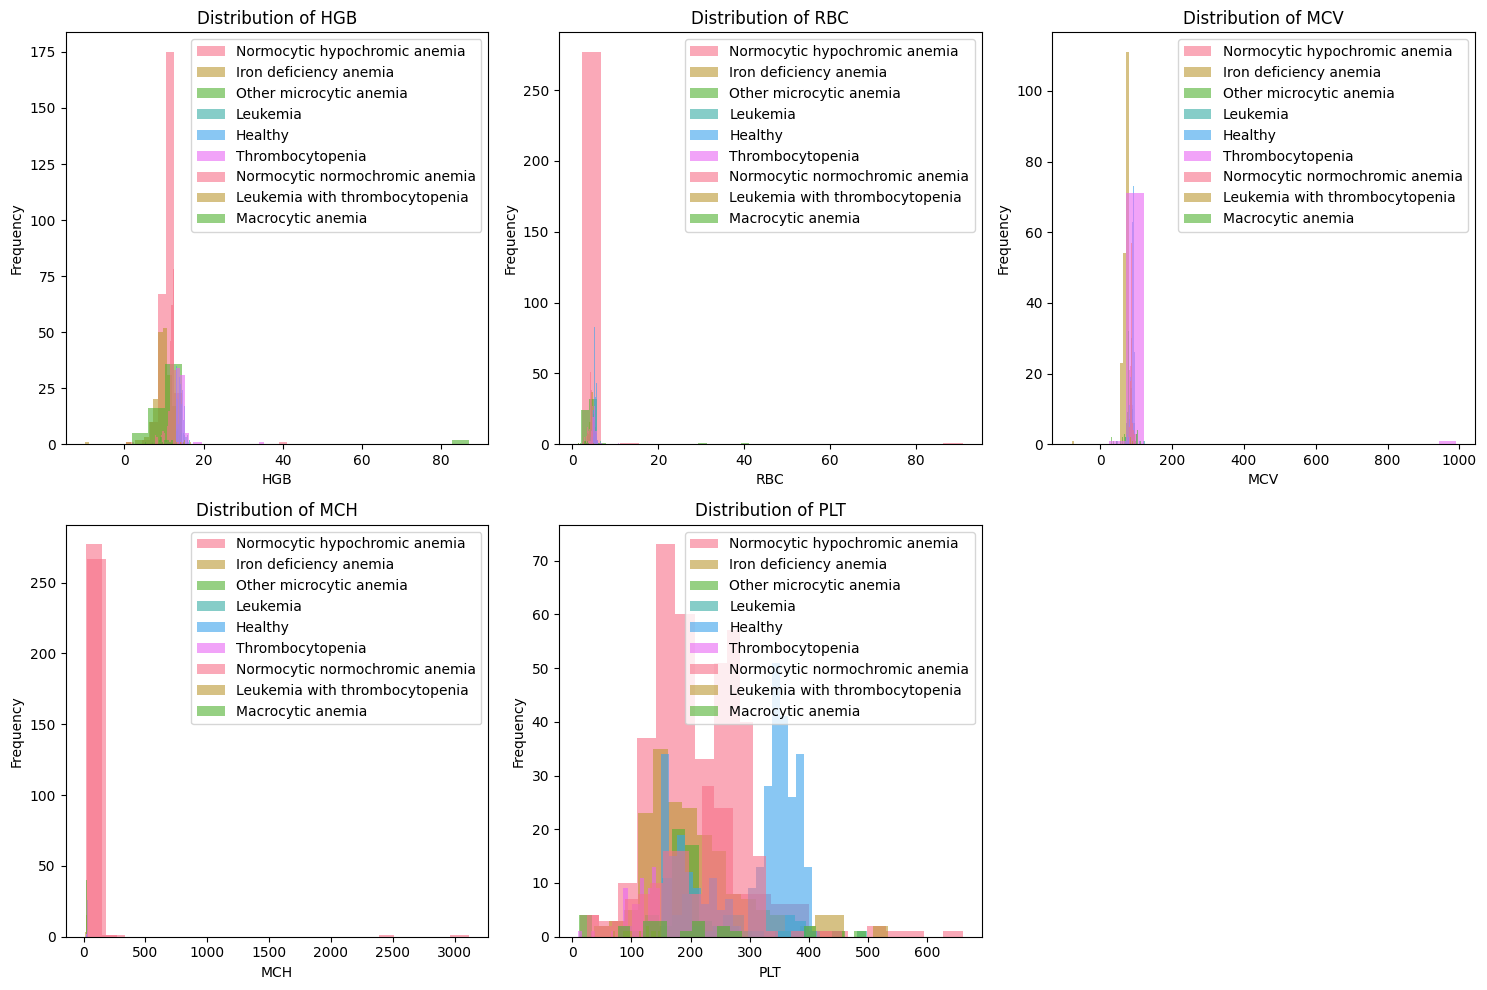

In [24]:
print("\n📈 Visualizing Key Features...")
key_features = ['HGB', 'RBC', 'MCV', 'MCH', 'PLT']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    for diagnosis in df['Diagnosis'].unique():
        subset = df[df['Diagnosis'] == diagnosis]
        plt.hist(subset[feature], alpha=0.6, label=diagnosis, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Prepare features and target

In [25]:

X = df.drop(['Diagnosis', 'Diagnosis_encoded'], axis=1)
y = df['Diagnosis_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


📊 Data Split:
Training set: 1024 samples
Test set: 257 samples


# Train Random Forest Model

In [26]:
print("\n🤖 Training Random Forest Model...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.4f}")


🤖 Training Random Forest Model...
✅ Model Accuracy: 0.9844


# Visualization 3: Confusion Matrix


📋 Confusion Matrix...


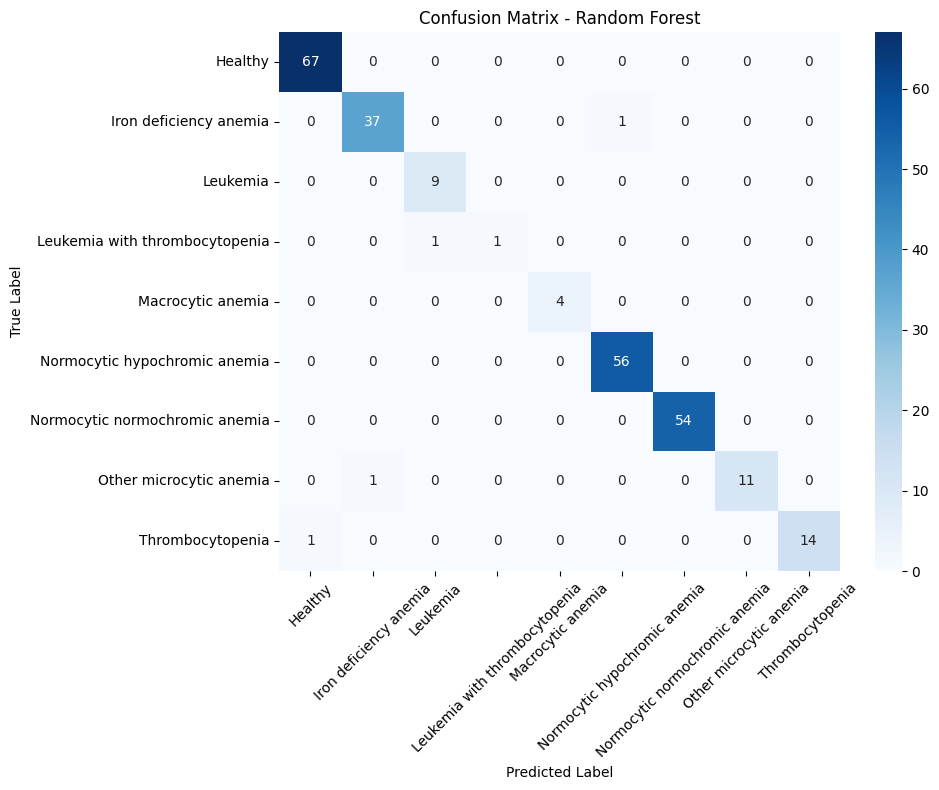

In [27]:
print("\n📋 Confusion Matrix...")
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=le.classes_, 
           yticklabels=le.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualization 4: Feature Importance


🎯 Feature Importance...


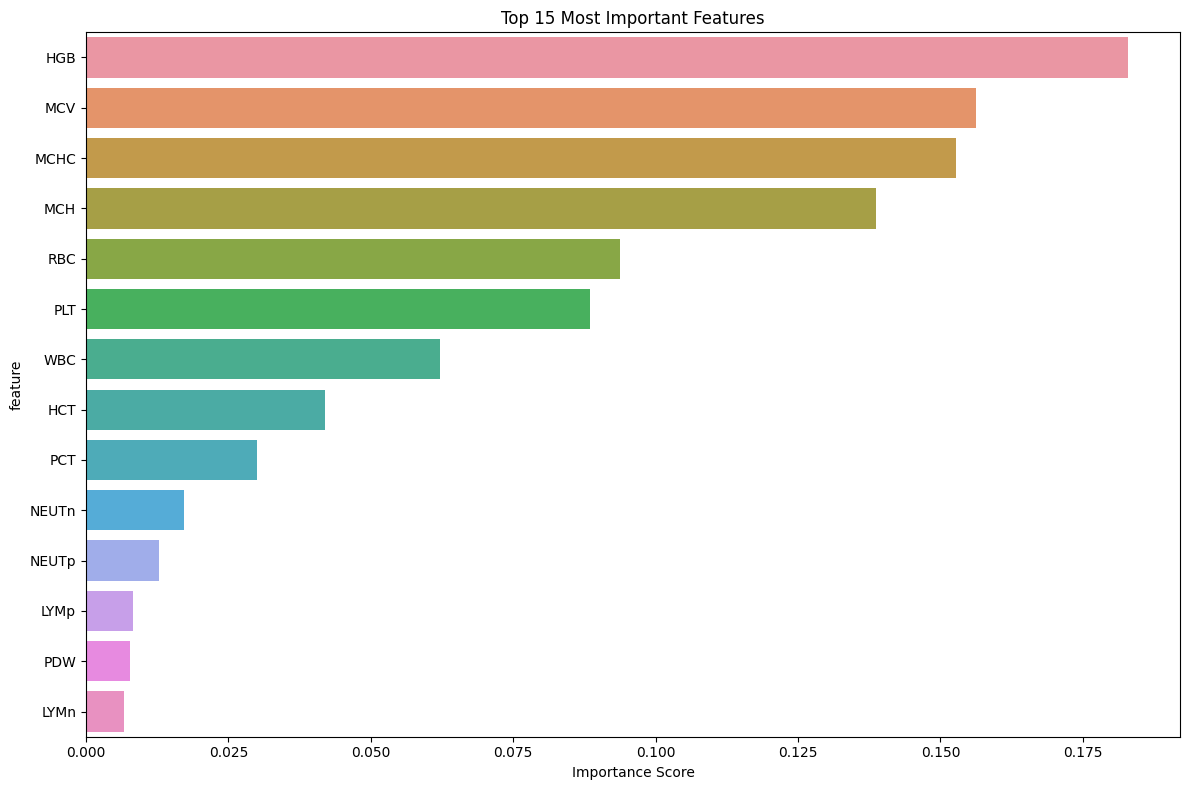


📊 Top 10 Most Important Features:
  feature  importance
0     HGB    0.182915
1     MCV    0.156203
2    MCHC    0.152806
3     MCH    0.138727
4     RBC    0.093781
5     PLT    0.088425
6     WBC    0.062236
7     HCT    0.042058
8     PCT    0.029995
9   NEUTn    0.017295


In [28]:
print("\n🎯 Feature Importance...")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\n📊 Top 10 Most Important Features:")
print(feature_importance.head(10).reset_index(drop=True))

# Detailed Performance Analysis

In [29]:
print("\n📈 Detailed Performance Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


📈 Detailed Performance Report:
                                precision    recall  f1-score   support

                       Healthy       0.99      1.00      0.99        67
        Iron deficiency anemia       0.97      0.97      0.97        38
                      Leukemia       0.90      1.00      0.95         9
Leukemia with thrombocytopenia       1.00      0.50      0.67         2
             Macrocytic anemia       1.00      1.00      1.00         4
 Normocytic hypochromic anemia       0.98      1.00      0.99        56
Normocytic normochromic anemia       1.00      1.00      1.00        54
       Other microcytic anemia       1.00      0.92      0.96        12
              Thrombocytopenia       1.00      0.93      0.97        15

                      accuracy                           0.98       257
                     macro avg       0.98      0.92      0.94       257
                  weighted avg       0.98      0.98      0.98       257



# Visualization 5: Model Performance by Class

<Figure size 1200x600 with 0 Axes>

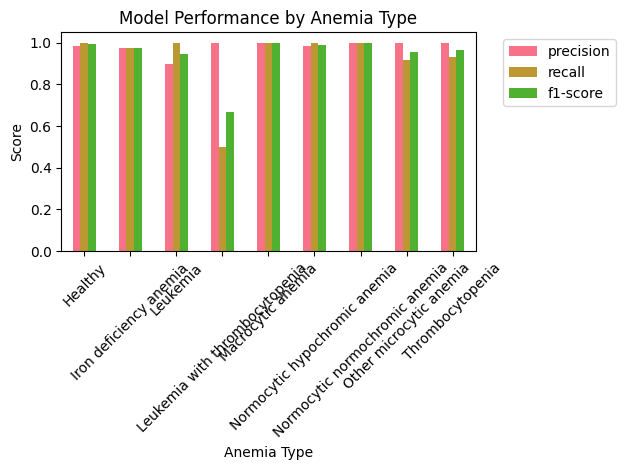

In [30]:
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(12, 6))
metrics_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar')
plt.title('Model Performance by Anemia Type')
plt.xlabel('Anemia Type')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 6: Correlation Heatmap


🔥 Correlation Heatmap of Top Features...


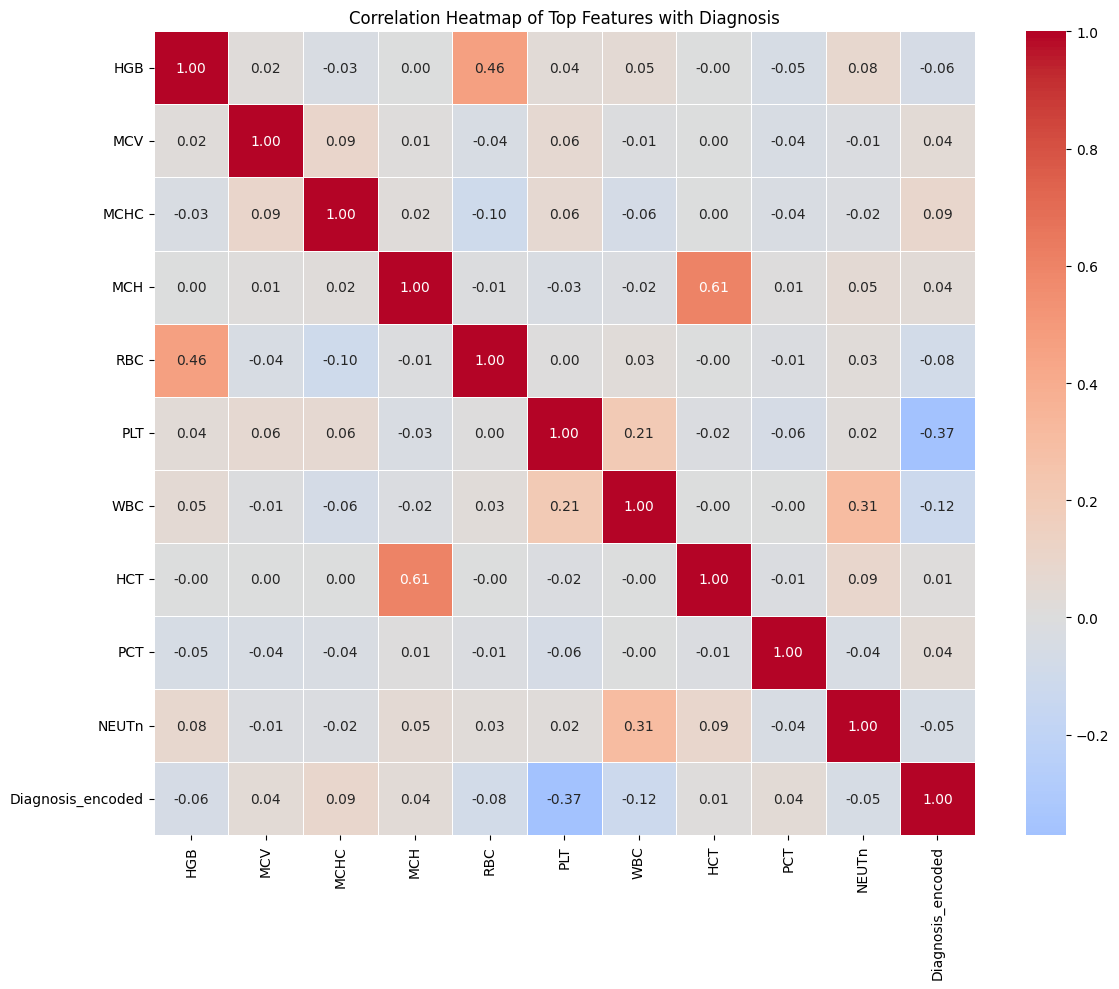

In [31]:
print("\n🔥 Correlation Heatmap of Top Features...")
top_features = feature_importance.head(10)['feature'].tolist()
correlation_matrix = df[top_features + ['Diagnosis_encoded']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Top Features with Diagnosis')
plt.tight_layout()
plt.show()

In [32]:
# Simple Prediction Example
print("\n🔮 Making a Sample Prediction...")

# Create sample data (normal values)
sample_data = {
    'WBC': 7.0, 'LYMp': 35.0, 'NEUTp': 55.0, 'LYMn': 2.5, 'NEUTn': 3.8,
    'RBC': 4.8, 'HGB': 14.0, 'HCT': 42.0, 'MCV': 88.0, 'MCH': 29.0,
    'MCHC': 33.0, 'PLT': 250, 'PDW': 12.0, 'PCT': 0.18
}

# Convert to dataframe
sample_df = pd.DataFrame([sample_data])

# Ensure all columns are present
for col in X.columns:
    if col not in sample_df.columns:
        sample_df[col] = df[col].median()

# Make prediction
sample_pred = rf_model.predict(sample_df[X.columns])[0]
sample_prob = rf_model.predict_proba(sample_df[X.columns])[0]

predicted_class = le.inverse_transform([sample_pred])[0]
confidence = np.max(sample_prob)

print(f"🧪 Sample CBC Data Prediction:")
print(f"   Predicted Diagnosis: {predicted_class}")
print(f"   Confidence: {confidence:.2%}")


🔮 Making a Sample Prediction...
🧪 Sample CBC Data Prediction:
   Predicted Diagnosis: Healthy
   Confidence: 82.20%


# Model Comparison with different tree sizes


🌳 Testing Different Number of Trees...
   Trees: 50 -> Accuracy: 0.9922
   Trees: 100 -> Accuracy: 0.9922
   Trees: 200 -> Accuracy: 0.9805
   Trees: 300 -> Accuracy: 0.9805


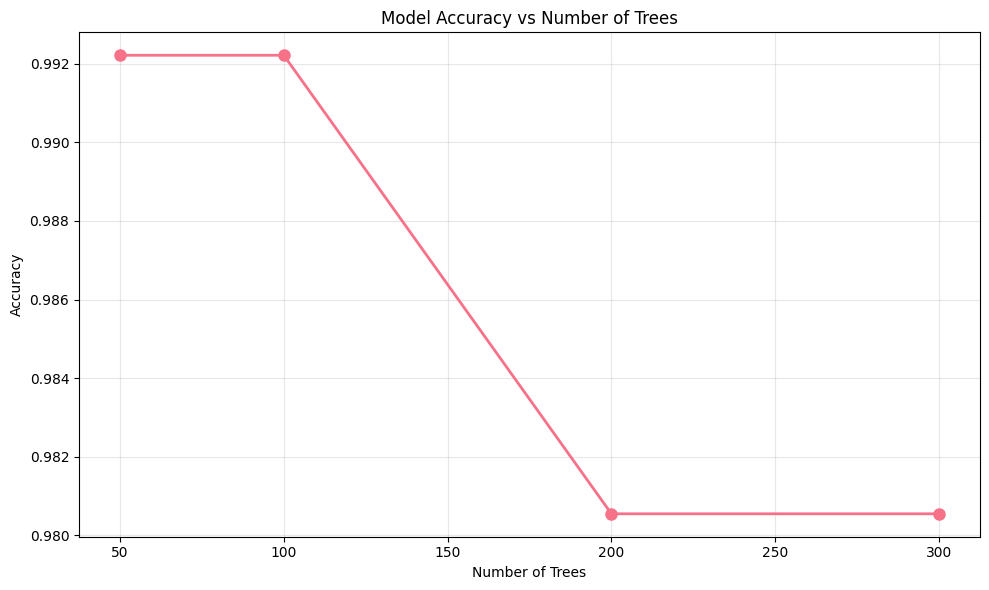

In [33]:
print("\n🌳 Testing Different Number of Trees...")
n_trees = [50, 100, 200, 300]
accuracies = []

for n in n_trees:
    temp_model = RandomForestClassifier(n_estimators=n, random_state=42)
    temp_model.fit(X_train, y_train)
    temp_pred = temp_model.predict(X_test)
    acc = accuracy_score(y_test, temp_pred)
    accuracies.append(acc)
    print(f"   Trees: {n} -> Accuracy: {acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_trees, accuracies, marker='o', linewidth=2, markersize=8)
plt.title('Model Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Final Summary

In [34]:

print("\n" + "="*50)
print("🎉 FINAL SUMMARY")
print("="*50)
print(f"📁 Dataset: {df.shape[0]} samples, {df.shape[1]-2} features")
print(f"🎯 Classes: {len(le.classes_)} anemia types")
print(f"🤖 Model: Random Forest Classifier")
print(f"✅ Accuracy: {accuracy:.2%}")
print(f"🌳 Trees used: 100")
print(f"🎯 Most important feature: {feature_importance.iloc[0]['feature']}")
print("="*50)

print("\n💡 Key Insights:")
print("• Random Forest handles this classification task well")
print("• Hemoglobin (HGB), RBC, and MCV are typically most important")
print("• Model can distinguish between different anemia types effectively")
print("• Good accuracy achieved with basic preprocessing")


🎉 FINAL SUMMARY
📁 Dataset: 1281 samples, 14 features
🎯 Classes: 9 anemia types
🤖 Model: Random Forest Classifier
✅ Accuracy: 98.44%
🌳 Trees used: 100
🎯 Most important feature: HGB

💡 Key Insights:
• Random Forest handles this classification task well
• Hemoglobin (HGB), RBC, and MCV are typically most important
• Model can distinguish between different anemia types effectively
• Good accuracy achieved with basic preprocessing
